## Dataset: Pittsburgh Police Arrest Data
### Data Source: https://data.wprdc.org/dataset/arrest-data
Notebook authored by: Shinwoo Kim (`SHK148@pitt.edu`)


This Notebook will evalute arrest data by neighborhood. The data contains information on people taken into custody by City of Pittsburgh police officers. Often, people are arrested for more serious crimes such as felony offenses in comparison to minor misdemeanors. The dataset contains information reported by City of Pittsburgh Police. 

Let's import the necessary libraries.

In [1]:
# load numpy, pandas, seaborn, matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
#import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

Let's investigate the crime(arrests) around Pittsburgh!

In [16]:
# load data from data set
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f") 

In [11]:
# Dropping unnecessary columns
arrests.drop(['INCIDENTZONE','INCIDENTTRACT', 'COUNCIL_DISTRICT', 'X', 'Y', 'PUBLIC_WORKS_DIVISION',], axis=1, inplace=True)


# Formatting arrest time properly
arrests['ARRESTTIME'] = pd.to_datetime(arrests['ARRESTTIME'])


arrests.tail(3)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD
51847,2042572,21188015,35.0,F,B,2021-10-18 15:00:00,"600 Block 1st AV Pittsburgh, PA 15219",2706 Terroristic Threats.,"200 Block Fern ST Pittsburgh, PA 15224",Garfield
51848,2042573,21188037,64.0,M,W,2021-10-13 16:27:00,"2100 Block Noblestown RD Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance /...,"2100 Block Noblestown RD Pittsburgh, PA 15205",Westwood
51849,2042578,21188774,26.0,F,W,2021-10-14 18:00:00,"20 Block Shiloh ST & Virginia AV Pittsburgh, P...",9501 Bench Warrant,"20 Block Shiloh ST & Virginia AV Pittsburgh, P...",Mount Washington


Let's look at what crimes people were arrested for!

In [12]:
print (arrests["OFFENSES"].unique())

['3929 Retail Theft.' '13(a)(16) Possession of Controlled Substance'
 '5503 Disorderly Conduct. / 5505 Public Drunkenness' ...
 '3929 Retail Theft. / 5104 Resisting Arrest or Other Law Enforcement. / 5121 Escape. / 13(a)(32) Paraphernalia - Use or Possession'
 '2702 Aggravated Assault. / 3304 Criminal Mischief. / 5121 Escape. / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant'
 '2706 Terroristic Threats. / 6106 Firearms not to be Carried without a License. / 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 6110.1 Possesion of Firearm by Minor / 6110.2 Possesion of Firearm with Altered Mfg. Number / 2701(a)(3) Simple Assault - Attempts by Physical Menace ']


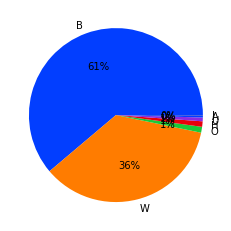

In [18]:

Demo_Race = arrests.groupby(by=['RACE'])['RACE'].count().reset_index(name='counts').sort_values(by='counts', ascending=False)
Demo_Race
#Demo_Race.sort_values(by='counts', ascending=True)

# Making a pie chart that shows demographics of those arrested

race = Demo_Race['RACE']
arrests = Demo_Race['counts']

labels = []
arrest_data = []


for item in race.iteritems():
    labels.append(item[1])
for item in arrests.iteritems():
    arrest_data.append(item[1])

# define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

# create pie chart
plt.pie(arrest_data, labels = labels , colors = colors, autopct='%.0f%%')

plt.show()


Interesting(`not really`). Of the people arrested in PGH, 61% were black, even though they make up only ~25% of the population. *Ahem. Racial Bias??*

---

Let's look at which neighborhoods have the most & least amount of arrests.

In [17]:
tally = arrests['INCIDENTNEIGHBORHOOD'].value_counts().rename_axis('neighborhood').reset_index(name='counts')
tally.sort_values(by='counts', ascending=True)

,neighborhood,counts
97,Mt. Oliver Neighborhood,2
96,Troy Hill-Herrs Island,6
95,Mt. Oliver Boro,17
94,Central Northside,23
93,Regent Square,27
...,...,...
4,Homewood South,1683
3,East Allegheny,1716
2,Carrick,1847
1,South Side Flats,2682


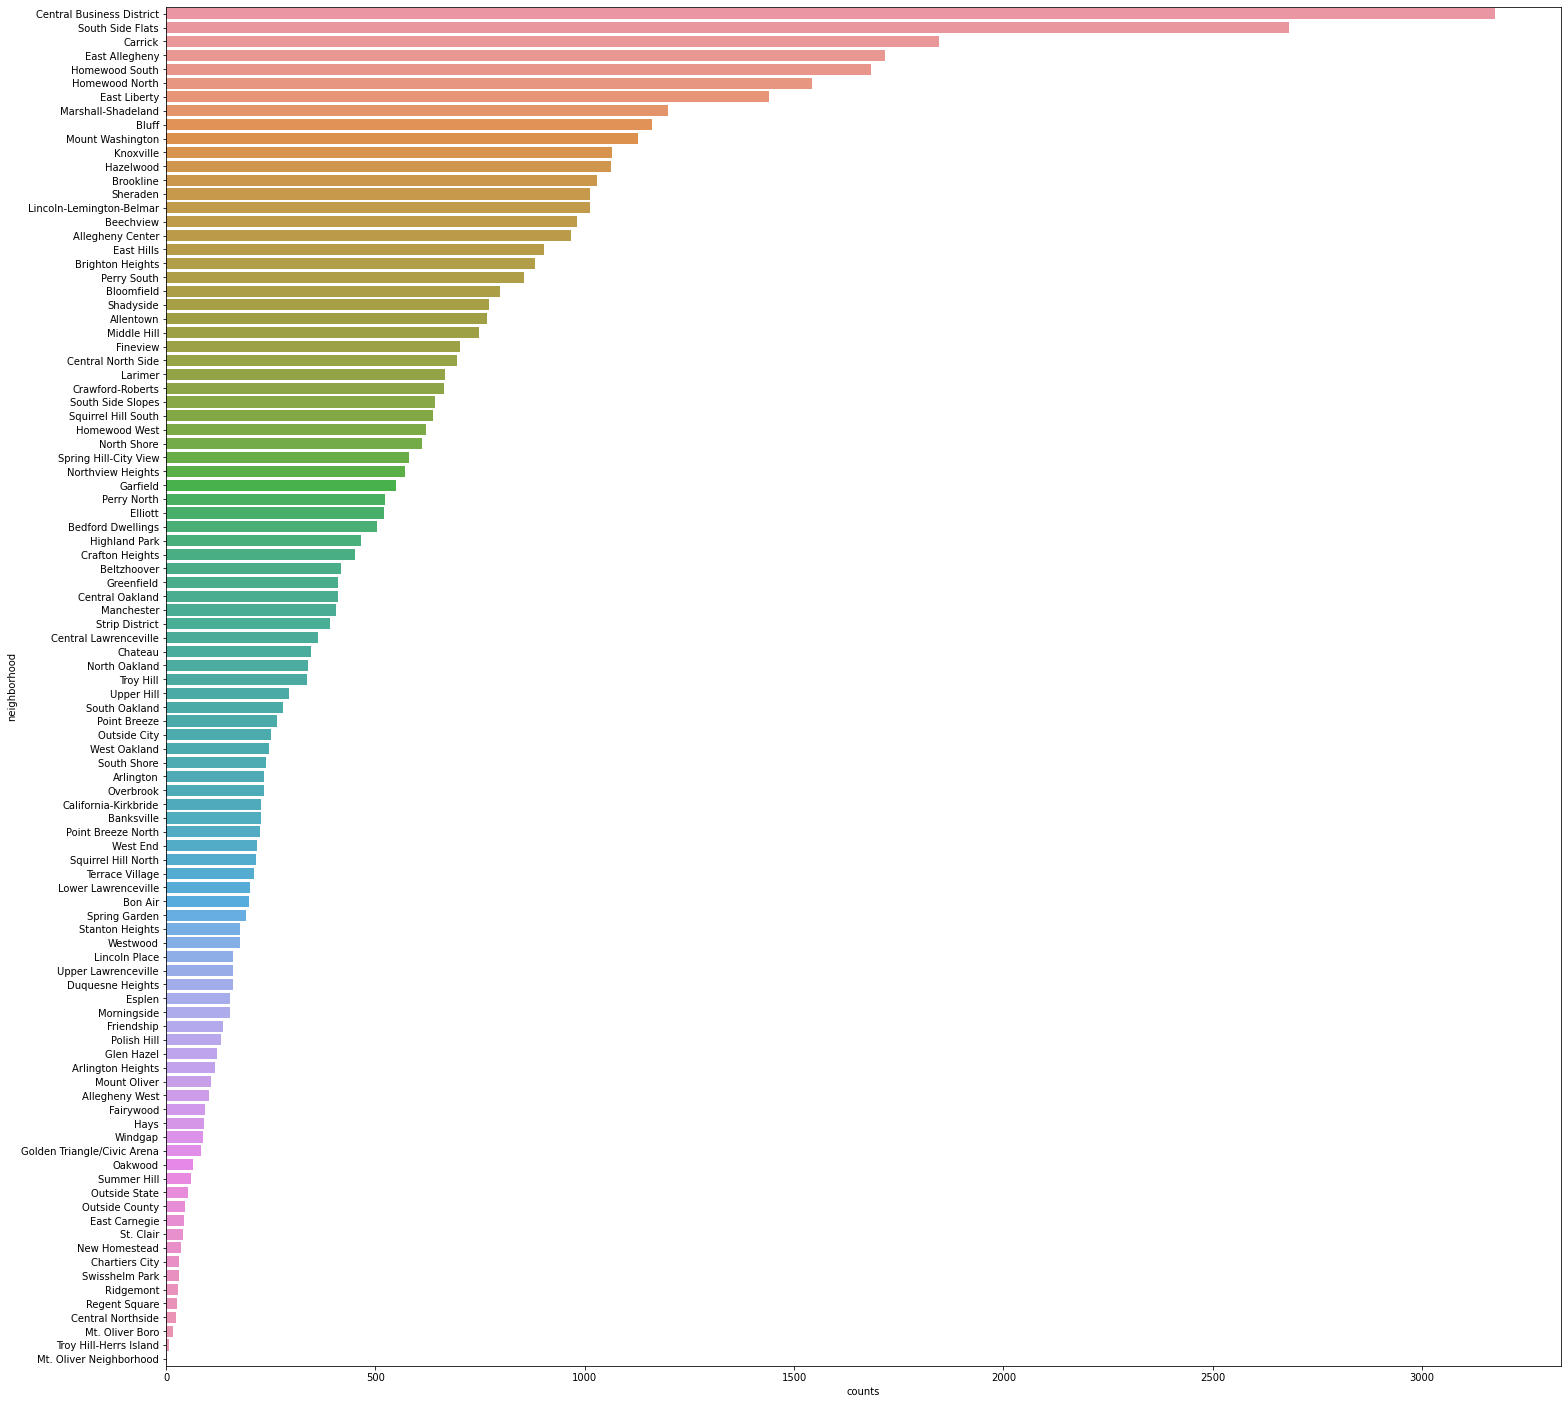

In [21]:
#print(tally.plot.bar(x='neighborhood', y='counts', figsize=(25,2), width=0.5, position=1, fontsize=14))
fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x = "counts", 
            y = "neighborhood", 
            ax=ax, 
            data=tally, 
            orient="h", 
            order=tally.sort_values('counts', ascending = False).neighborhood)

And the prize goes to .... **Mt. Oliver Neighborhood**

In [22]:
print("Neighborhood with least amount of arrests: \n ",tally.nsmallest(1, ['counts']))

Neighborhood with least amount of arrests: 
                 neighborhood  counts
97  Mt. Oliver Neighborhood       2
